In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
import json
import tweepy

# Data gathering
1. locally stored twitter-archive-enhanced.csv
2. Downloading https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Get additional information using Python's Tweepy library e.g. retweet count, likes
4. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [182]:
#the first source of data by use read_csv()
archive_df= pd.read_csv('twitter-archive-enhanced-2.csv')
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [183]:
#download the image prediction file programmatically using requests library.
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_prediction_df =pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [184]:
consumer_key = 'XXXXX'
consumer_secret = 'XXXXX'
access_token = 'XXXXX'
access_secret = 'XXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


def extract_tweet_status_info(text_file):
    retweet_count_list=[]
    favorite_count_list=[]
    id_list=[]
    for line in text_file:
        json_content = json.loads(line)
        retweet_count_list.append(json_content['retweet_count'])
        favorite_count_list.append(json_content['favorite_count'])
        id_list.append(json_content['id'])
    d={'retweet_count': retweet_count_list, 'favorite_count':favorite_count_list, 'tweet_id': id_list}
    return pd.DataFrame(d)

In [185]:
# Loading downloaded tweet_json_copy.txt in to a data frame
with open('tweet-json', 'r') as tweet_file_copy:
    api_tweet_df = extract_tweet_status_info(tweet_file_copy)

api_tweet_df.head()

,retweet_count,favorite_count,tweet_id
0,8853,39467,892420643555336193
1,6514,33819,892177421306343426
2,4328,25461,891815181378084864
3,8964,42908,891689557279858688
4,9774,41048,891327558926688256


# Assess Data
> In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

> The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

## Assess tweeter archive

In [186]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [187]:
archive_df.duplicated().sum()

0

In [188]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [189]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [190]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Assess image prediction

In [191]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [192]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [193]:
image_prediction_df.duplicated().sum()

0

## Assess tweet api


In [194]:
api_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   tweet_id        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [195]:
api_tweet_df.describe()

,retweet_count,favorite_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,7.426978e+17
std,5284.770364,11814.771334,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,624.500000,1415.000000,6.783975e+17
50%,1473.500000,3603.500000,7.194596e+17
75%,3652.000000,10122.250000,7.993058e+17
max,79515.000000,132810.000000,8.924206e+17


In [196]:
api_tweet_df.duplicated().sum()

0

## Quality issues:

* The original tweets all we need so remove retweets
* Timestamp is a string rather than datetime
* in column name there are dogs named (a) it should be None
* p1,p2 and p3 have unnessary underscore instead of space
* There is (59) row that does not have expanded_url, and they are not useful so, we should drop them
* There are some denominators that are greater than 10 in twitter archive
* There are outliers in numerators in twitter_archive
* The tweet_id is should be str instade of int

## Tidiness issues:

*  Unclear Column names(p1,p2,p3)
*  in twitter archive doggo, pupper, puppo, and floofer are dog stage.
*  unused column img_num

In [197]:
#Make copies of the orignal dataframe for cleaning step
archive_clean = archive_df.copy()
image_clean =image_prediction_df.copy()
tweet_clean =api_tweet_df.copy()

# cleaning data

In [198]:
# removing retweet from dataframe
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()== True].index, inplace= True)
archive_clean.shape[0]

2175

In [199]:
#Dropping  columns with retweet infomation
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

In [200]:
# removing in_reply_to_status_id and in_reply_to_user_id as it only has 75 non null values
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

In [201]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In [202]:
#write function to convert string to datetime
def convert_to_datetime(date):
    x = pd.to_datetime(date)
    return x

archive_clean['timestamp'] = archive_clean['timestamp'].apply(convert_to_datetime)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [203]:
#Strip the Anchor tag from the source column and keep the content between the tags using lamada and apply method
import re
archive_clean.source = archive_clean.source.apply(lambda x: re.sub('<[^<]+?>', '', x))

In [204]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [205]:
#replace any dog who have letter (a) as name to (None) for now, we can make it using (replace) method)
archive_clean.name = archive_clean.name.str.replace('a', 'None')

In [206]:
#check
archive_clean.query("name == 'a'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [207]:
#to make all string lower case I will use lower() function on p1 ,p2 and p3 

image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

In [208]:
image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [209]:
sum(image_clean['jpg_url'].duplicated())

66

In [210]:
# dropping duplicates jpg_url
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [211]:
#check
sum(image_clean['jpg_url'].duplicated())

0

In [212]:
# make string.replace function to repalce _ 
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

In [213]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [214]:
#change columns names(p1,p2,p3) to first_pred, second_pred, third_pred
image_clean = image_clean.rename(columns={"p1": "first_pred", "p2": "second_pred", "p3": "third_pred"})

In [215]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_pred', 'p1_conf', 'p1_dog', 'second_pred', 'p2_conf', 'p2_dog', 'third_pred', 'p3_conf', 'p3_dog'], dtype='object')

In [216]:
# using as type function changing format type from number to string on all three dataframe

archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype('str')

In [217]:
# Melt the the columns into values
archive_clean = pd.melt(archive_clean, id_vars = ['tweet_id', 'timestamp','source', 'text','expanded_urls', 'rating_numerator',   
       'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], \
        var_name = 's', value_name = 'dog_stage')

In [218]:
archive_clean = archive_clean.drop('s', 1)

In [219]:
# check
archive_clean['dog_stage'].value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [220]:
# deleted duplicated value
archive_clean = archive_clean.drop_duplicates()

In [221]:
# check
archive_clean['dog_stage'].value_counts()

None       2175
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [222]:
#drop the 59 rows that have missing values
archive_clean.dropna(subset = ['expanded_urls'] , inplace = True)

In [223]:
#check if there still missing values 
sum(archive_clean.expanded_urls.isnull())

0

In [224]:
#Investigate the denominators that are greater than 10

pd.set_option('display.width', 1000)

denom_outliers = archive_clean.query("rating_denominator > 10")
denom_outliers.style.set_properties(subset=['text'], **{'width': '300px'})

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
363,820690176645140481,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None
733,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None
890,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None
942,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None
987,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None
1024,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None
1050,713900603437621249,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None
1075,710658690886586372,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None
1095,709198395643068416,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None
1172,704054845121142784,2016-02-28 21:25:30+00:00,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,None,None


In [225]:
#These are the errors that do not have a denominator of 10 and the text does not give a correct rating
id_errors = [ 832088576586297345,820690176645140481,758467244762497024,
            731156023742988288,713900603437621249,710658690886586372,
            709198395643068416,704054845121142784,697463031882764288,
            686035780142297088,684225744407494656,684222868335505415,
            682808988178739200,677716515794329600,675853064436391936 ]

In [226]:
#Set the correct values for these tweets

archive_clean.at[1068,'rating_numerator'] = 11
archive_clean.at[1068,'rating_denominator'] = 10
archive_clean.at[1165,'rating_numerator'] = 13
archive_clean.at[1165,'rating_denominator'] = 10
archive_clean.at[1202,'rating_numerator'] = 11
archive_clean.at[1202,'rating_denominator'] = 10
archive_clean.at[1662,'rating_numerator'] = 10
archive_clean.at[1662,'rating_denominator'] = 10

In [227]:
#Drop the tweets that we don't have ratings for
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(id_errors)]

In [228]:
#denom_outliers should now be an empty dataframe as we have dropped the errors and corrected the ones we could find ratings for
denom_outliers = archive_clean.query("rating_denominator > 10")
denom_outliers = denom_outliers[~denom_outliers['tweet_id'].isin(id_errors)]
denom_outliers

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
363,820690176645140481,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None
733,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None
890,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None
942,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None
987,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None
1024,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None
1050,713900603437621249,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None
1075,710658690886586372,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None
1095,709198395643068416,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None
1172,704054845121142784,2016-02-28 21:25:30+00:00,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,None,None


In [229]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
archive_clean.sort_values(by = ['rating_numerator'], ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
804,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None
1895,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None
942,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None
733,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None
1600,677716515794329600,2015-12-18 05:06:23+00:00,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None
...,...,...,...,...,...,...,...,...,...
1690,675153376133427200,2015-12-11 03:21:23+00:00,Twitter for iPhone,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1,10,None,None
2157,666104133288665088,2015-11-16 04:02:55+00:00,Twitter for iPhone,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None
2080,667549055577362432,2015-11-20 03:44:31+00:00,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,None
840,746906459439529985,2016-06-26 03:22:31+00:00,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None


In [230]:
archive_clean.at[313,'rating_numerator'] = 13
archive_clean.at[313,'rating_denominator'] = 10
archive_clean.at[695,'rating_numerator'] = 10 
archive_clean.at[763,'rating_numerator'] = 11
archive_clean.at[1712,'rating_numerator'] = 11
archive_clean.at[55,'rating_numerator'] = 13

In [231]:
# the biggest correct rating is 14
archive_clean = archive_clean[archive_clean.rating_numerator <15]

In [232]:
#it should have all the numerator and denominator outliers removed
archive_clean.sort_values(by = ['rating_numerator'], ascending=False).head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
4857,794205286408003585,2016-11-03 15:51:10+00:00,Twitter for iPhone,This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af https://t.co/trSjgY3h4g,"https://twitter.com/dog_rates/status/794205286408003585/photo/1,https://twitter.com/dog_rates/status/794205286408003585/photo/1,https://twitter.com/dog_rates/status/794205286408003585/photo/1",14,10,LNoneikNone,pupper
636,774314403806253056,2016-09-09 18:31:54+00:00,Twitter for iPhone,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpfxIH,"https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1",14,10,None,None
143,860184849394610176,2017-05-04 17:30:24+00:00,Twitter for iPhone,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co/upRYxG4KbG",https://twitter.com/dog_rates/status/860184849394610176/photo/1,14,10,None,None
4702,822462944365645825,2017-01-20 15:17:01+00:00,Twitter for iPhone,"This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO","https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1",14,10,GNonebe,pupper
4521,854120357044912130,2017-04-17 23:52:16+00:00,Twitter for iPhone,Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,"https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1",14,10,None,pupper


In [233]:
# drop unused culomns
image_clean.drop('img_num', axis=1, inplace=True)

## merging data frames

In [234]:
# using merge function make one final dataframe
 
df_master = pd.merge(archive_clean, image_clean, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, tweet_clean, on = 'tweet_id', how = 'inner' )

In [235]:
# checking result from above code 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2211
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2212 non-null   object             
 1   timestamp           2212 non-null   datetime64[ns, UTC]
 2   source              2212 non-null   object             
 3   text                2212 non-null   object             
 4   expanded_urls       2212 non-null   object             
 5   rating_numerator    2212 non-null   int64              
 6   rating_denominator  2212 non-null   int64              
 7   name                2212 non-null   object             
 8   dog_stage           2212 non-null   object             
 9   jpg_url             2212 non-null   object             
 10  first_pred          2212 non-null   object             
 11  p1_conf             2212 non-null   float64            
 12  p1_dog              2212 non-null 

In [236]:
df_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,second_pred,p2_conf,p2_dog,third_pred,p3_conf,p3_dog,retweet_count,favorite_count
1417,686730991906516992,2016-01-12 02:06:41+00:00,Twitter for iPhone,I just love this picture. 12/10 lovely af https://t.co/Kc84eFNhYU,https://twitter.com/dog_rates/status/686730991906516992/photo/1,12,10,None,None,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,...,0.338812,True,newfoundland,0.180925,True,golden retriever,0.180023,True,1350,4543
863,743980027717509120,2016-06-18 01:33:55+00:00,Twitter for iPhone,This is Geno. He's a Wrinkled Baklavian Velveeta. Looks sad but that's just the extra skin. 11/10 would smoosh face https://t.co/Kxda28JmQ2,https://twitter.com/dog_rates/status/743980027717509120/photo/1,11,10,Geno,None,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,...,0.975730,True,rhodesian ridgeback,0.008073,True,pug,0.005571,True,1231,4551
1827,673270968295534593,2015-12-05 22:41:22+00:00,Twitter for iPhone,This is Mac. His dad's probably a lawyer. 11/10 https://t.co/mjC0QpXGum,https://twitter.com/dog_rates/status/673270968295534593/photo/1,11,10,MNonec,None,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,...,0.610453,True,maltese dog,0.166815,True,old english sheepdog,0.132015,True,400,1134
195,850019790995546112,2017-04-06 16:18:05+00:00,Twitter for iPhone,Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,"https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1",12,10,Boomer,pupper,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,...,0.759907,True,collie,0.107405,True,pembroke,0.052335,True,5459,21944
282,832998151111966721,2017-02-18 17:00:10+00:00,Twitter for iPhone,"This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0","https://twitter.com/dog_rates/status/832998151111966721/photo/1,https://twitter.com/dog_rates/status/832998151111966721/photo/1",13,10,Rhino,doggo,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,...,0.539036,True,french bulldog,0.317617,True,bull mastiff,0.093928,True,2522,14549


### Storing, Analyzing, and Visualizing Data for this Project

In [237]:
#Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.


df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Insight :The most popular dog breed

In [238]:
# higher favorite_count
df_master.groupby('dog_stage').favorite_count.mean().sort_values(ascending = False)

dog_stage
puppo      22911.318182
doggo      16691.926471
floofer    13701.375000
None        8325.647459
pupper      6874.243902
Name: favorite_count, dtype: float64

In [239]:
# higher retweet_count
df_master.groupby('dog_stage').retweet_count.mean().sort_values(ascending = False)

dog_stage
puppo      7096.681818
doggo      5980.485294
floofer    4776.750000
None       2521.160817
pupper     2222.400000
Name: retweet_count, dtype: float64

In [240]:
# higher rating_numerator
df_master.groupby('dog_stage').rating_numerator.mean().sort_values(ascending = False)

dog_stage
puppo      12.045455
floofer    11.875000
doggo      11.676471
pupper     10.609756
None       10.491881
Name: rating_numerator, dtype: float64

###  what are the most used source for rating in weRateDogs?

In [241]:
df_master.groupby('source')['tweet_id'].count().reset_index()['tweet_id'].tolist()

[12, 27, 2173]

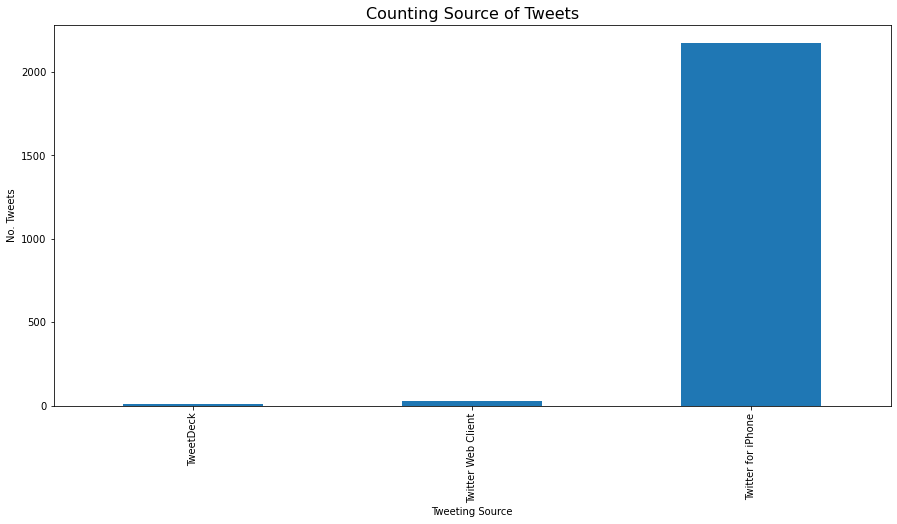

In [242]:
plt.figure(figsize = [15, 7])

df_master.groupby('source')['tweet_id'].count().plot(kind='bar')

plt.title('Counting Source of Tweets', size='16')
plt.xlabel('Tweeting Source')
plt.ylabel('No. Tweets');

###  what are the most common hour of dogs rating tweets?

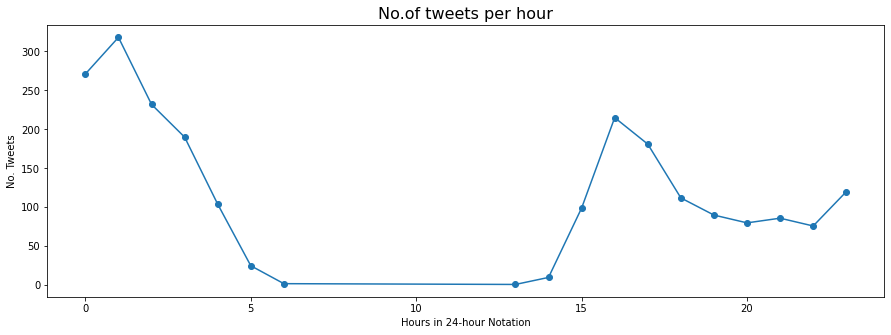

In [243]:
plt.figure(figsize = [15, 5])

df_master.groupby(df_master.timestamp.dt.hour).tweet_id.count().plot(kind='line', marker='o')

plt.title('No.of tweets per hour', size='16')
plt.xlabel('Hours in 24-hour Notation')
plt.ylabel('No. Tweets');

###  What are the top ten favorited bread? 


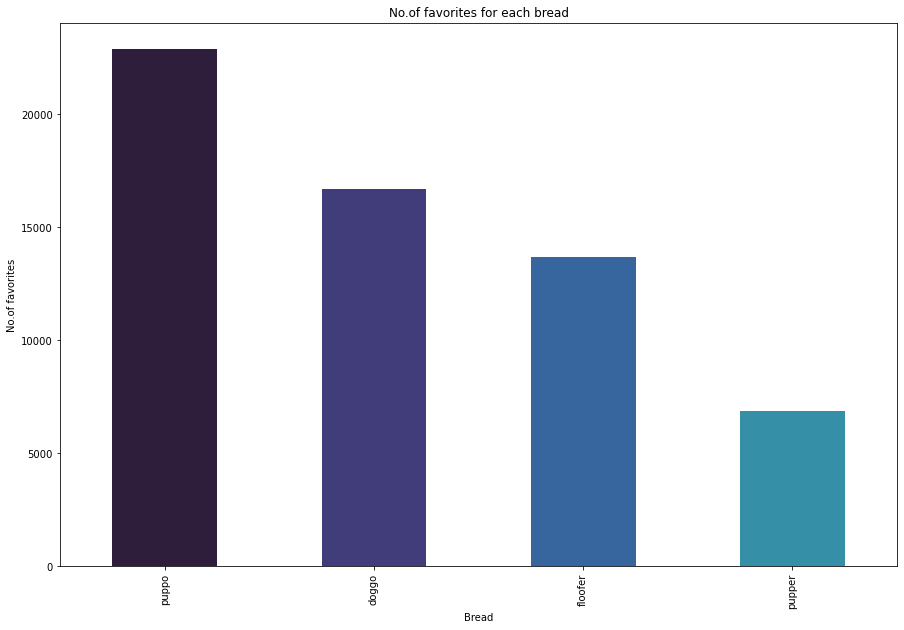

In [244]:
plot = df_master.groupby('dog_stage')['favorite_count'].mean().head(10).sort_values(ascending=False).drop("None")

plot.plot(kind='bar', figsize=(15,10), color=sns.color_palette("mako"))

plt.title('No.of favorites for each bread')
plt.xlabel('Bread')
plt.ylabel('No.of favorites');



### graphically check the relationship between 'retweet_count' and 'favourite_count'

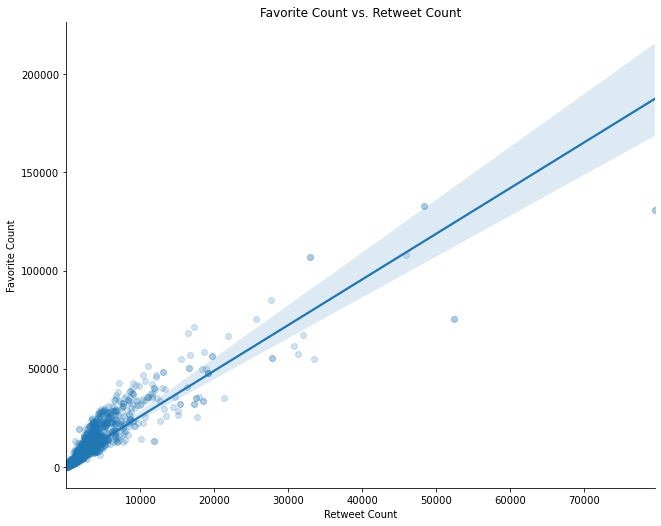

In [245]:
#plotting a graph of favorite vs retweet
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_master,
           height = 7,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite Count vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

In [246]:
from IPython.display import Image
from IPython.core.display import HTML 



max_v= df_master.favorite_count.max()
im_url= df_master[df_master['favorite_count']==max_v]['jpg_url']
print ('the image with the highest favorite_count :')
Image(url= "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg",width=250, height=250)

the image with the highest favorite_count :


In [247]:
max_r= df_master.rating_numerator.max()
im_url= df_master[df_master['rating_numerator']==max_r]['jpg_url']
print ('the image with the highest rating_numerator:')
Image(url= "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg",width=250, height=250)

the image with the highest rating_numerator:
